In [48]:
#импорт инструментов

import csvtools
import datetime

In [49]:
#использование инструмента по навигации в записях дневников

dw = csvtools.DumpWrapper('.')
notes = dw.notes()

In [90]:
#пример выкачивания записей в дни полнолуний и сохранений их в отдельные документы по дням

new_moon = ['1936-1-17',   '1936-1-18',   '1936-1-19',
             '1936-2-16',   '1936-2-17',   '1936-2-18',
             '1936-3-18',   '1936-3-19',   '1936-3-20', 
             '1936-4-17',   '1936-4-18',   '1936-4-19', 
             '1936-5-16',   '1936-5-17',   '1936-5-18',
             '1936-6-15',   '1936-6-16',   '1936-6-17',
             '1936-7-14',  '1936-7-15',   '1936-7-16',
             '1936-8-13',  '1936-8-14',  '1936-9-15', 
             '1936-9-12',  '1936-9-13',  '1936-9-14', 
             '1936-10-10', '1936-10-11', '1936-10-12', 
             '1936-11-9', '1936-11-10', '1936-11-11',
             '1936-12-8', '1936-12-9', '1936-12-10']

for date in new_moon:
    d = tuple(map(int, date.split('-')))
    print(d)
    l = notes.searchDate(d)
    with open ('{}.txt'.format(date), 'w', encoding='utf8') as f:
        for i in l:
            f.write(i.text)
            f.flush()
        f.close()

In [1]:
import codecs,re,os
from pymystem3 import Mystem
import codecs, os, sys, pickle
import gensim
from gensim import corpora, models
import nltk
from nltk import FreqDist
from nltk.collocations import *

mystem_object = Mystem()
mystem_object.start()

from stop_words import get_stop_words
ru_stop = get_stop_words('ru')
extra_stops = ['свой', 'говорить', 'идти', 'приходить', 'знать', 'пойти', 'становиться', 'давать', 'час', 
               'какой-то', 'видеть', 'думать', 'р', 'н', 'й', 'з', 'оставаться', 'начинать', 'взять', 'стоять', 'выходить']


def processDir(dir):
    doc_set = []
    dirlist = os.listdir(dir)
    for filenum in range(len(dirlist)):
        doc_set.append(processFile(dirlist[filenum]))
    return doc_set

        
def topic_modeling(doc_set):
    dictionary = corpora.Dictionary(doc_set)
    corpus = [dictionary.doc2bow(text) for text in doc_set]
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
    ldamodel[corpus]
    print ("\n\ntopics\n\n")
    for a in ldamodel.show_topics(num_topics=4, num_words=7):
        for i in a:
            print (i)

            
def processFile(name): 
    doc = []
    f = codecs.open('new/'+name, 'r', 'utf-8').read()
    clean_doc = []
    words = mystem_object.analyze(f)
    for word in words:
        if word.get('analysis') != None and word.get('analysis') != [] and word['analysis'][0]['lex'] not in ru_stop and word['analysis'][0]['lex'] not in extra_stops:
            clean_doc.append(word['analysis'][0]['lex'])
    return clean_doc
    
     
doc_set = processDir('new')    
topic_modeling(doc_set)



topics


0
0.005*"вечер" + 0.003*"дело" + 0.003*"работа" + 0.003*"утро" + 0.003*"письмо" + 0.003*"писать" + 0.002*"новый"
1
0.004*"вечер" + 0.003*"работа" + 0.003*"утро" + 0.002*"хороший" + 0.002*"работать" + 0.002*"большой" + 0.002*"новый"
2
0.004*"вечер" + 0.003*"утро" + 0.003*"работа" + 0.003*"хороший" + 0.003*"дело" + 0.002*"ночь" + 0.002*"писать"
3
0.004*"вечер" + 0.003*"работа" + 0.002*"хороший" + 0.002*"утро" + 0.002*"новый" + 0.002*"получать" + 0.002*"дело"


In [13]:
import codecs,re,os
from pymystem3 import Mystem
import codecs, os, sys, pickle
import gensim
from gensim import corpora, models
import nltk
from nltk import FreqDist
from nltk.collocations import *

mystem_object = Mystem()
mystem_object.start()

from stop_words import get_stop_words
ru_stop = get_stop_words('ru')
extra_stops = ['свой', 'говорить', 'идти', 'приходить', 'знать', 'пойти', 'становиться', 'давать', 'час', 
               'какой-то', 'видеть', 'думать', 'р', 'н', 'й', 'з', 'оставаться', 'начинать', 'взять', 'стоять', 'выходить']


def processDir(dir):
    doc_set = []
    dirlist = os.listdir(dir)
    for filenum in range(len(dirlist)):
        doc_set.append(processFile(dirlist[filenum]))
    return doc_set


def topic_modeling(doc_set):
    dictionary = corpora.Dictionary(doc_set)
    corpus = [dictionary.doc2bow(text) for text in doc_set]
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
    ldamodel[corpus]
    print ("\n\ntopics\n\n")
    for a in ldamodel.show_topics(num_topics=4, num_words=7):
        for i in a:
            print (i)
     
    
def processFile(name): 
    doc = []
    if 'DS_Store' not in name: 
        f = codecs.open('full/'+name, 'r', 'utf-8').read()
        clean_doc = []
        words = mystem_object.analyze(f)
        for word in words:
            if word.get('analysis') != None and word.get('analysis') != [] and word['analysis'][0]['lex'] not in ru_stop and word['analysis'][0]['lex'] not in extra_stops:
                clean_doc.append(word['analysis'][0]['lex'])
    else:
        clean_doc = []
    return clean_doc
    
     
doc_set = processDir('full')    
topic_modeling(doc_set)



topics


0
0.004*"вечер" + 0.003*"утро" + 0.003*"работа" + 0.003*"дело" + 0.002*"новый" + 0.002*"ночь" + 0.002*"письмо"
1
0.004*"вечер" + 0.003*"утро" + 0.002*"большой" + 0.002*"дело" + 0.002*"хороший" + 0.002*"работа" + 0.002*"получать"
2
0.005*"вечер" + 0.003*"утро" + 0.003*"работа" + 0.003*"дело" + 0.003*"хороший" + 0.002*"ночь" + 0.002*"жить"
3
0.004*"вечер" + 0.003*"работа" + 0.003*"дело" + 0.003*"утро" + 0.003*"хороший" + 0.003*"получать" + 0.002*"ничто"


In [15]:
import codecs,re,os
from pymystem3 import Mystem
import codecs, os, sys, pickle
import gensim
from gensim import corpora, models
import nltk
from nltk import FreqDist
from nltk.collocations import *

mystem_object = Mystem()
mystem_object.start()

from stop_words import get_stop_words
ru_stop = get_stop_words('ru')
extra_stops = ['свой', 'говорить', 'идти', 'приходить', 'знать', 'пойти', 'становиться', 'давать', 'час', 
               'какой-то', 'видеть', 'думать', 'р', 'н', 'й', 'з', 'оставаться', 'начинать', 'взять', 'стоять', 'выходить']


def processDir(dir):
    doc_set = []
    dirlist = os.listdir(dir)
    for filenum in range(len(dirlist)):
        doc_set.append(processFile(dirlist[filenum]))
    return doc_set

        
def topic_modeling(doc_set):
    dictionary = corpora.Dictionary(doc_set)
    corpus = [dictionary.doc2bow(text) for text in doc_set]
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
    ldamodel[corpus]
    print ("\n\ntopics\n\n")
    for a in ldamodel.show_topics(num_topics=4, num_words=7):
        for i in a:
            print (i)
            
            
def processFile(name): 
    doc = []
    if 'DS_Store' not in name: 
        f = codecs.open('days/'+name, 'r', 'utf-8').read()
        clean_doc = []
        words = mystem_object.analyze(f)
        for word in words:
            if word.get('analysis') != None and word.get('analysis') != [] and word['analysis'][0]['lex'] not in ru_stop and word['analysis'][0]['lex'] not in extra_stops:
                clean_doc.append(word['analysis'][0]['lex'])
    else:
        clean_doc = []
    return clean_doc
    
     
doc_set = processDir('days')    
topic_modeling(doc_set)



topics


0
0.004*"вечер" + 0.004*"работа" + 0.003*"утро" + 0.002*"новый" + 0.002*"ночь" + 0.002*"большой" + 0.002*"дело"
1
0.005*"вечер" + 0.003*"утро" + 0.003*"хороший" + 0.003*"работа" + 0.002*"ночь" + 0.002*"получать" + 0.002*"письмо"
2
0.004*"вечер" + 0.003*"работа" + 0.003*"утро" + 0.003*"новый" + 0.002*"дело" + 0.002*"самый" + 0.002*"большой"
3
0.003*"вечер" + 0.003*"дело" + 0.003*"утро" + 0.002*"работа" + 0.002*"большой" + 0.002*"ничто" + 0.002*"писать"


### Как видно из выдачи программы, темы для записей, сделанных в дни новолуний, полнолуний и остальных дней, особо ничем не отличаются. Ярко выделяются слова "вечер", "дело", "утро", "работа", "ночь" и другие. 

## Дополнительное

In [80]:
import csv

note_to_dob = dict()

with open('prozhito_prep_table.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=";")
    header = next(reader)
    for line in reader:
        note_to_dob[line[0]] = line[1] 

note_to_dob

{'185495': '01.01.1900',
 '185496': '01.01.1900', ...

In [81]:
len(note_to_dob) # -- столько записей в файле prozhito_prep_table.csv

273938

In [82]:
note_to_diary = dict()
diary_to_note = dict()

with open('notes.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter="#")
    for line in reader:
        note_to_diary[line[0].strip(',')] = line[1].strip(',')
        diary_to_note[line[1].strip(',')] = line[0].strip(',')

note_to_diary 

{'39081': '130',
 '39082': '130', ...

In [83]:
len(note_to_diary) # -- столько записей в файле notes.csv

384587

In [84]:
print(len(note_to_dob) - len(note_to_diary)) # -- разница в записях в файлах prozhito_prep_table.csv и notes.csv

-110649


diary_to_note

{'130': '38834',
 '234': '39085', ...

In [85]:
len(diary_to_note) # -- столько дневников в файле notes.csv

1517

In [86]:
diary_to_dob = dict()

for note, diary in note_to_diary.items():
    if note in note_to_dob:
        if diary in diary_to_dob:
            i = diary_to_dob[diary][1] + 1
            diary_to_dob[diary] = [note_to_dob[note], i]
        else:
            i = 1
            diary_to_dob[diary] = [note_to_dob[note], i]
    else:
        continue

In [87]:
len(diary_to_dob)

851

diary_to_dob

{'10': ['1880-11-28', 568],
 '100': ['21.06.1941', 1631],

In [96]:
day = []
month = []
count = []

for diary, dob in diary_to_dob.items():
    if '.' in dob[0]:
        day.append(dob[0].split('.')[0])
        month.append(dob[0].split('.')[1])
    elif '-' in dob[0]:
        day.append(dob[0].split('-')[2])
        month.append(dob[0].split('-')[1])
    else:
        print(dob)
    count.append(dob[1])

In [97]:
len(day), len(month), len(count)

(851, 851, 851)

In [98]:
signs_to_people = {'Aries':0, 'Taurus':0, 'Gemini':0, 'Cancer':0, 'Leo':0, 'Virgo':0, 
         'Libra':0, 'Scorpio':0, 'Sagittarius':0, 'Capricorn':0, 'Aquarius':0, 'Pisces':0}

In [99]:
for d, m in zip (day, month):
    if m == '01':
        if d >= '21':
            signs_to_people['Aquarius'] += 1
        else:
            signs_to_people['Capricorn'] += 1
    elif m == '02':
        if d >= '20':
            signs_to_people['Pisces'] += 1
        else:
            signs_to_people['Aquarius'] += 1
    elif m == '03':
        if d >= '21':
            signs_to_people['Aries'] += 1
        else:
            signs_to_people['Pisces'] += 1
    elif m == '04':
        if d >= '21':
            signs_to_people['Taurus'] += 1
        else:
            signs_to_people['Aries'] += 1
    elif m == '05':
        if d >= '22':
            signs_to_people['Gemini'] += 1
        else:
            signs_to_people['Taurus'] += 1
    elif m == '06':
        if d >= '22':
            signs_to_people['Cancer'] += 1
        else:
            signs_to_people['Gemini'] += 1
    elif m == '07':
        if d >= '23':
            signs_to_people['Leo'] += 1
        else:
            signs_to_people['Cancer'] += 1
    elif m == '08':
        if d >= '22':
            signs_to_people['Virgo'] += 1
        else:
            signs_to_people['Leo'] += 1
    elif m == '09':
        if d >= '24':
            signs_to_people['Libra'] += 1
        else:
            signs_to_people['Virgo'] += 1
    elif m == '10':
        if d >= '24':
            signs_to_people['Scorpio'] += 1
        else:
            signs_to_people['Libra'] += 1
    elif m == '11':
        if d >= '23':
            signs_to_people['Sagittarius'] += 1
        else:
            signs_to_people['Scorpio'] += 1
    elif m == '12':
        if d >= '23':
            signs_to_people['Capricorn'] += 1
        else:
            signs_to_people['Sagittarius'] += 1

In [100]:
for k,v in signs_to_people.items():
    print(k,v)

Aries 65
Taurus 43
Gemini 41
Cancer 32
Leo 46
Virgo 51
Libra 50
Scorpio 46
Sagittarius 48
Capricorn 333
Aquarius 46
Pisces 49


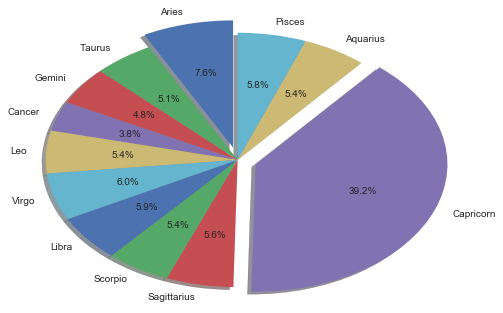

In [101]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

labels = []
numbers = []

for k,v in signs_to_people.items():
    labels.append(k)
    numbers.append(v)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0)

plt.pie(numbers, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 
plt.axis('normal')
plt.show()
plt.savefig('1.png')

### С большим отрывом побеждают Козероги. Далее с небольшим опережением остальных знаков расположились Овны. Потом все знаки распределились примерно одинаково. Минимум наблюдается у Раков.

In [102]:
signs_to_notes = {'Aries':0, 'Taurus':0, 'Gemini':0, 'Cancer':0, 'Leo':0, 'Virgo':0, 
         'Libra':0, 'Scorpio':0, 'Sagittarius':0, 'Capricorn':0, 'Aquarius':0, 'Pisces':0}

In [103]:
for d, m, c in zip (day, month, count):
    if m == '01':
        if d >= '21':
            signs_to_notes['Aquarius'] += c
        else:
            signs_to_notes['Capricorn'] += c
    elif m == '02':
        if d >= '20':
            signs_to_notes['Pisces'] += c
        else:
            signs_to_notes['Aquarius'] += c
    elif m == '03':
        if d >= '21':
            signs_to_notes['Aries'] += c
        else:
            signs_to_notes['Pisces'] += c
    elif m == '04':
        if d >= '21':
            signs_to_notes['Taurus'] += c
        else:
            signs_to_notes['Aries'] += c
    elif m == '05':
        if d >= '22':
            signs_to_notes['Gemini'] += c
        else:
            signs_to_notes['Taurus'] += c
    elif m == '06':
        if d >= '22':
            signs_to_notes['Cancer'] += c
        else:
            signs_to_notes['Gemini'] += c
    elif m == '07':
        if d >= '23':
            signs_to_notes['Leo'] += c
        else:
            signs_to_notes['Cancer'] += c
    elif m == '08':
        if d >= '22':
            signs_to_notes['Virgo'] += c
        else:
            signs_to_notes['Leo'] += c
    elif m == '09':
        if d >= '24':
            signs_to_notes['Libra'] += c
        else:
            signs_to_notes['Virgo'] += c
    elif m == '10':
        if d >= '24':
            signs_to_notes['Scorpio'] += c
        else:
            signs_to_notes['Libra'] += c
    elif m == '11':
        if d >= '23':
            signs_to_notes['Sagittarius'] += c
        else:
            signs_to_notes['Scorpio'] += c
    elif m == '12':
        if d >= '23':
            signs_to_notes['Capricorn'] += c
        else:
            signs_to_notes['Sagittarius'] += c

In [104]:
for k,v in signs_to_notes.items():
    print(k,v)

Aries 27666
Taurus 12431
Gemini 12863
Cancer 8555
Leo 20230
Virgo 25779
Libra 12474
Scorpio 14173
Sagittarius 12681
Capricorn 78854
Aquarius 18870
Pisces 18946


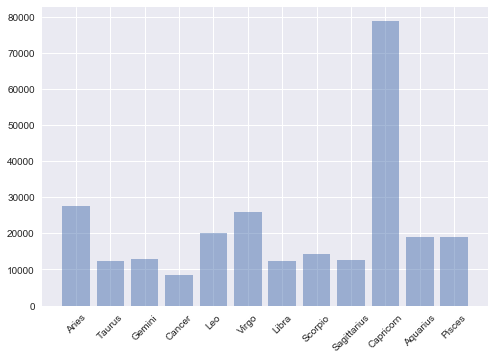

In [107]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')


signs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 
         'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']
x_axis = np.arange(len(signs))
y_axis = [v for k,v in signs_to_notes.items()]
plt.xticks(x_axis, signs, rotation=45)
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.show()
plt.savefig('2.png')

### Все также с большим отрывом лидируют Козероги. За ними Овны, очень близко Дева. Далее все идет более-менее одинаково. Как и в предыдущем графике Раки на последнем месте. Из интересного здесь только случай с Девой, потому что из предыдущего графика Девы на 1.6% уступали Овнам, а здесь идут почти вровень. То есть людей Дев меньше, но записей они сделали на уровне количества людей Овнов.